<a href="https://colab.research.google.com/github/Nicole1216/2015lab10/blob/master/Udacity_Course_Completion_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Portfolio  Nicole (Song) Ni**



# **Learner Graduation Likelihood Prediction**

# **Table of Contents**
- [Project Objective and Dataset](#section_1)
- [Import Required Libraries](#section_2)
- [Data Investigation and Cleaning](#section_3)
- [Feature Engineering (Create New Features)](#section_4)
- [Exploratory Data Analysis](#section_5)
- [Feature Engineering (post Train/Test split)](#section_6)
- [Training Model And Evaluating](#section_7)
- [Model Explanation](#section_8)

<a name="section_1"></a>
# **Project Objective and Dataset**

### **Background and Objective**

**Introduction**
I propose to develop a predictive model for my hypothetical client, an online education company specializing in providing educational content and services to enterprise clients. With a significant learner base of approximately 100,000 annually, my client seeks to improve the course completion rates, which currently average below 50%.

**Business Problem**
The primary challenge lies in the low course completion rates, which are crucial for the client's enterprise customers aiming to maximize their employees' training outcomes. Despite offering various supportive services, the company lacks a systematic method to identify learners at high risk of not completing their courses and to match them with the most effective resources.

**Objective**
My project aims to develop a predictive model that assesses individual learners' likelihood of course completion. This model will highlight key factors influencing completion rates, enabling targeted interventions to support learners effectively, thereby improving overall completion metrics.


### **About Dataset**

Data collected contains course characteristics (type, length, difficulty, etc), learners' interaction logs (content completion pace, weekly active time, etc), and contract types between the learners' employers and the education company. Address data imbalances using techniques like SMOTE and conduct initial feature engineering to ensure data quality and relevance.

**This dataframe contains 86 variables**

native_company_id: A unique identifier for the company associated with the learner's enrollment.

company_name: The name of the company associated with the learner's enrollment.
native_contract_id: A unique identifier for the learner's contract.
native_contract_term_id: The specific term or period associated with the learner's contract.

stu_contract_flag: A flag indicating whether the learner has a contract.

stu_contract_grace_period_in_days: The number of days in the grace period of the student's contract.

company_auto_enroll_flag: A flag indicating whether the learner was automatically enrolled by the company.

is_subscription: A flag indicating whether the learner's enrollment is part of a subscription model.

is_teams_contract: A flag indicating whether the learner's enrollment is part of a team contract.

is_company_sso: A flag indicating whether the company uses Single Sign-On for learner authentication.

native_user_id: A unique identifier for the user.

enrollment_id: A unique identifier for the learner's enrollment record.

email: The learner's email address.

enrolled_at: The date and time the learner enrolled in the program.

program_title: The title of the program in which the learner is enrolled.

program_key: A unique key identifying the program.

program_type: The type of program, such as full-time, part-time, or self-paced.

last_active_at: The last date and time the learner was active in the program.

cohort_name: The name of the cohort or group the learner is part of.

tag_names: A list of tags or labels associated with the learner's enrollment.

on_track_status_new: Indicates the current progress status of the learner in their program.

enrollment_status: The enrollment status of the learner, such as active or dropped.

unenrolled_at: The date and time the learner unenrolled from the program.

graduated_at: The date and time the learner completed the program.

total_mandatory_projects: The total number of mandatory projects required for program completion.

total_mandatory_projects_completed: The number of mandatory projects the learner has completed.

perc_mandatory_projects_completed: The percentage of mandatory projects completed by the learner.

total_mandatory_projects_completed_in_latest_enrollment: The number of mandatory projects completed during the learner's most recent enrollment period.

last_project_completed_at: The date and time the learner last completed a project.

is_next_project_past_due: A flag indicating whether the learner has a project that is past its due date.

next_project_due_days: The number of days until the learner's next project is due.

total_mandatory_concepts: The total number of mandatory concepts that need to be understood for program completion.

total_mandatory_concepts_completed: The number of mandatory concepts the learner has completed.

perc_mandatory_concepts_completed: The percentage of mandatory concepts completed by the learner.

total_mandatory_concepts_completed_in_latest_enrollment: The number of mandatory concepts completed in the latest enrollment period.

last_concept_completed_at: The date and time the learner last completed a concept.

total_quizzes_completed: The total number of quizzes the learner has completed.

total_quizzes: The total number of quizzes available in the learner's program.

primary_school: The primary education institution associated with the learner.

difficulty_level: The rated difficulty level of the content the learner is engaging with.

program_category: The category or subject area of the program.

recommendation_rating: The learner's rating of the program based on recommendations.

grad_survey_submission_date: The date the learner submitted a survey upon graduation.

knowledge_question_asked_count: The number of knowledge-based questions the learner has asked.

zendesk_ticket_count: The number of support tickets submitted by the learner.

ticket_count_with_good_csat_rating: The count of tickets with positive customer satisfaction ratings.

ticket_count_with_bad_csat_rating: The count of tickets with negative customer satisfaction ratings.

concept_completion_before_program: The completion status of any concepts before the program start.

concept_completion_1_week: The number of concepts completed by the learner in the first week.

concept_completion_2_week: Concepts completed in the second week, and similarly for the subsequent week variables up to 8th week.

project_completion_1_week: The number of project completed by the learner in the first week up to the 8th week.

project_completion_after_2_months: Projects completed after two months into the program.

project_submitted_1_week: The number of projects submitted in the first week, and similarly for the subsequent week variables.

project_failed_1_week: Projects failed or not passed in the first week, and similarly for the subsequent week variables..

project_failed_after_2_months: Projects failed after two months into the program.

estimated_end_date: The projected completion date for the learner's program.

avg_project_pass_rate: The average pass rate of projects completed by the learner.


In [ ]:
!pip install lightgbm

In [ ]:
!pip install xgboost

In [ ]:
!pip install shap

<a name="section_2"></a>
# **Import Required Libraries**

In [ ]:
# General utilities and data manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Model Training and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from scipy.stats import shapiro
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Ensemble Learning & Over-sampling
from imblearn.over_sampling import SMOTE

# Gradient Boosting Machines
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
import lightgbm

# Deep Learning with TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Google Colab specific (for working with Google Sheets and authentication)
from google.colab import auth
from google.auth import default
import gspread

In [ ]:
# Authenticate user
auth.authenticate_user()

# Get default credentials and create gspread client
creds, _ = default()
gc = gspread.authorize(creds)

# Open the spreadsheet by its ID
spreadsheet_id = '1wbNP4v3pnSByN9PrSPjP5ElQ-81w2B8aFBTm4lhBtdk'
worksheet = gc.open_by_key(spreadsheet_id).sheet1

# Get all values from the worksheet
rows = worksheet.get_all_values()

# Convert to a DataFrame
df = pd.DataFrame(rows[1:], columns=rows[0])

<a name="section_3"></a>
# **Data Investigation and Cleaning**
### **Data Profiling**
### **Drop Duplicates**
### **Check Data Types and Convert Data Types**


In [ ]:
df

In [ ]:
print('no of rows in dataset: ',df.shape[0])
print('no of columns in dataset: ',df.shape[1])

no of rows in dataset:  8136
no of columns in dataset:  86


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8136 entries, 0 to 8135
Data columns (total 86 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   native_company_id                                        8136 non-null   object
 1   company_name                                             8136 non-null   object
 2   native_contract_id                                       8136 non-null   object
 3   native_contract_term_id                                  8136 non-null   object
 4   stu_contract_flag                                        8136 non-null   object
 5   stu_contract_grace_period_in_days                        8136 non-null   object
 6   company_auto_enroll_flag                                 8136 non-null   object
 7   is_subscription                                          8136 non-null   object
 8   is_teams_contract                     

## **Drop Duplicates**

In [ ]:
duplicates_count = df.duplicated(subset='enrollment_id', keep=False).sum()

print(f"Number of duplicated rows based on 'enrollment_id': {duplicates_count}")

Number of duplicated rows based on 'enrollment_id': 632


In [ ]:
df = df.drop_duplicates(subset='enrollment_id', keep='first')

## **Check Data Types and Convert Data Types**

In [ ]:
# Adjust both settings to be sure
pd.set_option('display.max_columns', None)  # Ensure all columns are considered
pd.set_option('display.max_rows', None)  # Ensure all columns are considered

# Get the data types of each column
column_data_types = df.dtypes

# Print the data types of each column
print("Data type of each column:")
print(column_data_types)

Data type of each column:
native_company_id                                          object
company_name                                               object
native_contract_id                                         object
native_contract_term_id                                    object
stu_contract_flag                                          object
stu_contract_grace_period_in_days                          object
company_auto_enroll_flag                                   object
is_subscription                                            object
is_teams_contract                                          object
is_company_sso                                             object
native_user_id                                             object
enrollment_id                                              object
email                                                      object
enrolled_at                                                object
program_title                                     

In [ ]:
# Convert columns to Float16
float16_columns = [
    'stu_contract_grace_period_in_days',
    'total_mandatory_projects', 'total_mandatory_projects_completed',
    'perc_mandatory_projects_completed',
    'total_mandatory_projects_completed_in_latest_enrollment',
    'next_project_due_days', 'total_mandatory_concepts',
    'total_mandatory_concepts_completed', 'perc_mandatory_concepts_completed',
    'total_mandatory_concepts_completed_in_latest_enrollment',
    'total_quizzes_completed', 'total_quizzes', 'recommendation_rating',
    'knowledge_question_asked_count', 'zendesk_ticket_count',
    'ticket_count_with_good_csat_rating', 'ticket_count_with_bad_csat_rating',
    'avg_project_pass_rate',
    'concept_completion_before_program', 'concept_completion_1_week',
    'concept_completion_2_week', 'concept_completion_3_week',
    'concept_completion_4_week', 'concept_completion_5_week',
    'concept_completion_6_week', 'concept_completion_7_week',
    'concept_completion_8_week', 'concept_completion_after_2_months',
    'project_completion_1_week', 'project_completion_2_week',
    'project_completion_3_week', 'project_completion_4_week',
    'project_completion_5_week', 'project_completion_6_week',
    'project_completion_7_week', 'project_completion_8_week',
    'project_completion_after_2_months', 'project_submitted_1_week',
    'project_submitted_2_week', 'project_submitted_3_week',
    'project_submitted_4_week', 'project_submitted_5_week',
    'project_submitted_6_week', 'project_submitted_7_week',
    'project_submitted_8_week', 'project_submitted_after_2_months',
    'project_failed_1_week', 'project_failed_2_week',
    'project_failed_3_week', 'project_failed_4_week',
    'project_failed_5_week', 'project_failed_6_week',
    'project_failed_7_week', 'project_failed_8_week',
    'project_failed_after_2_months'
]

for column in float16_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce').astype('float16')

# Convert columns to Boolean
boolean_columns = [
    'company_auto_enroll_flag', 'is_subscription', 'is_teams_contract',
    'is_company_sso', 'is_next_project_past_due'
]

for column in boolean_columns:

    df[column] = df[column].replace({'True': True, 'False': False}).astype('bool')

# Convert columns to DateTime
datetime_columns = [
    'enrolled_at', 'last_active_at', 'graduated_at', 'last_concept_completed_at',
        'grad_survey_submission_date',
    'last_project_completed_at',
    'unenrolled_at',
    'estimated_end_date'
]

for column in datetime_columns:
    df[column] = pd.to_datetime(df[column])

df['estimated_end_date'] = df['estimated_end_date'].dt.tz_convert(None)

In [ ]:
column_data_types = df.dtypes
# Print the data types of each column
print("Data type of each column:")
print(column_data_types)

Data type of each column:
native_company_id                                                  object
company_name                                                       object
native_contract_id                                                 object
native_contract_term_id                                            object
stu_contract_flag                                                  object
stu_contract_grace_period_in_days                                 float16
company_auto_enroll_flag                                             bool
is_subscription                                                      bool
is_teams_contract                                                    bool
is_company_sso                                                       bool
native_user_id                                                     object
enrollment_id                                                      object
email                                                              object
enrolled_at 

In [ ]:
pd.set_option('display.max_rows', 100)

# Function to calculate missing data, considering both NaN and empty strings as missing
def calculate_missing_data(df):
    # Count NaN values per column
    missing_count_nan = df.isnull().sum()

    # Count empty strings per column
    missing_count_empty = (df == "").sum()

    # Combine counts to get total missing values per column
    total_missing = missing_count_nan + missing_count_empty

    # Calculate percentage of missing data
    missing_percentage = (total_missing / len(df)) * 100

    return missing_percentage

# Calculate the percentage of missing data for each column
missing_percentage = calculate_missing_data(df)

print("Percentage of missing data in each column:")
print(missing_percentage)

Percentage of missing data in each column:
native_company_id                                           0.000000
company_name                                                0.000000
native_contract_id                                          0.000000
native_contract_term_id                                     0.000000
stu_contract_flag                                           0.000000
stu_contract_grace_period_in_days                          27.829646
company_auto_enroll_flag                                    0.000000
is_subscription                                             0.000000
is_teams_contract                                           0.000000
is_company_sso                                              0.000000
native_user_id                                              0.000000
enrollment_id                                               0.000000
email                                                       0.000000
enrolled_at                                                 

In [ ]:
print('There are', df['native_company_id'].nunique(), 'unique companies.')
print('There are', df['company_name'].nunique(), 'unique company names.')
print('There are', df['native_user_id'].nunique(), 'unique learners.')
print('There are', df['enrollment_id'].nunique(), 'unique enrollments.')
print('There are', df['program_title'].nunique(), 'unique program titles.')
print('There are', df['program_key'].nunique(), 'unique program keys.')
print('There are', df['program_type'].nunique(), 'unique program types.')
print('There are', df['primary_school'].nunique(), 'unique primary schools.')
print('There are', df['difficulty_level'].nunique(), 'unique difficulty levels.')
print('Start date of enrollment in the dataset:', df['enrolled_at'].min())
print('Last active date in the dataset:', df['last_active_at'].max())
print('The dataset contains enrollments up to:', df['estimated_end_date'].max())

There are 161 unique companies.
There are 161 unique company names.
There are 5689 unique learners.
There are 7819 unique enrollments.
There are 245 unique program titles.
There are 238 unique program keys.
There are 1 unique program types.
There are 9 unique primary schools.
There are 5 unique difficulty levels.
Start date of enrollment in the dataset: 2022-01-04 00:00:00
Last active date in the dataset: 2024-04-09 00:00:00
The dataset contains enrollments up to: 2025-10-11 17:24:34


<a name="section_4"></a>
# **Feature Engineering (Create New Features)**

**program_length** : use estimated_end_date - enrolled_at

**graduated_or_not** : whether this learner graduated or not

**cohort_or_not** : whether this learner is in cohort or not

**group_or_not** : whether this learner is in group or not

**num_enrollments_same_time :** for this enrollment, how many enrollments this learner has during the same period of time. Use enrolled_at for each enrollment_id to the enrollment record for this user that he enrolled** within 50 days earlier** than this enrollment, or within 50 days later bold textthan this enrollment. (the average time for graduation is a 59 days; can change and test) ??? need Sensitivity Analysis: conduct a sensitivity analysis by varying the window size (e.g., 30, 50, 70 days) to see how it affects the count of concurrent enrollments. This can help identify a window size that captures meaningful relationships without being overly broad or narrow.

**with_project_or_not** : whether this learner's course has a project

**former_graduation_rate** : whether this learner graduated from any previous program

**number of previous graduations** : how many of previous program this learner graduated from

**num_previous_enrollments** whether this learner was enrolled in any previous program

***avg_former_recommendation_rating*** : if this learner graduated from any previous program, what was his/her recommendation rating for that program(s) through graduation survey

In [ ]:
# Calculate 'perc_quizzes_completed' correctly before it's used
df['perc_quizzes_completed'] = (df['total_quizzes_completed'] / df['total_quizzes']) * 100
df['perc_quizzes_completed'] = df['perc_quizzes_completed'].replace([np.inf, -np.inf], np.nan).fillna(0).round(2)

# Perform initial column calculations
df['program_length'] = (df['estimated_end_date'] - df['enrolled_at']).dt.days
df['graduated_or_not'] = df['graduated_at'].notnull().astype(int)
df['cohort_or_not'] = np.where(df['cohort_name'].isnull(), 'No', 'Yes')
df['group_or_not'] = np.where(df['tag_names'].isnull(), 'No', 'Yes')
df['with_project_or_not'] = (df['total_mandatory_projects'] > 0).astype(bool)

# Reset index for consistent DataFrame manipulation and sort by 'native_user_id' and 'enrolled_at'
df.reset_index(drop=True, inplace=True)
df.sort_values(by=['native_user_id', 'enrolled_at'], inplace=True)

# Simplify previous enrollments and graduations processing
df['num_previous_enrollments'] = df.groupby('native_user_id').cumcount()
df['graduated_before'] = df.groupby('native_user_id')['graduated_or_not'].cummax().shift(fill_value=0).map({0: 'No', 1: 'Yes'})

# Combine function applications into a streamlined process
def enrich_data(group):
    group['num_previous_graduations'] = group['graduated_or_not'].shift().cumsum().fillna(0)

    # Avoid division by zero by replacing 0 with np.nan for these calculations
    non_zero_enrollments = group['num_previous_enrollments'].replace(0, np.nan)

    # Calculate average knowledge questions and quizzes completed for past enrollments
    group['cumulative_knowledge_questions'] = group['knowledge_question_asked_count'].cumsum() - group['knowledge_question_asked_count']
    group['average_knowledge_question_past_enrollments'] = group['cumulative_knowledge_questions'] / non_zero_enrollments
    group['average_perc_quizzes_completed_past_enrollments'] = (group['perc_quizzes_completed'].cumsum() - group['perc_quizzes_completed']) / non_zero_enrollments

    # Calculate 'num_enrollments_same_time' within a 40-day window
    group['num_enrollments_same_time'] = group['enrolled_at'].apply(
        lambda x: ((group['enrolled_at'] >= x - pd.Timedelta(days=30)) & (group['enrolled_at'] <= x + pd.Timedelta(days=30))).sum())

    # Fill missing values with zeros for specific average calculations
    columns_to_zero_fill = ['average_knowledge_question_past_enrollments', 'average_perc_quizzes_completed_past_enrollments']
    group[columns_to_zero_fill] = group[columns_to_zero_fill].fillna(0)

    return group

# Apply the enrichments to each user group
df = df.groupby('native_user_id').apply(enrich_data).reset_index(drop=True)

# Further processing for rates and recommendation ratings
df['former_graduation_rate'] = df['num_previous_graduations'] / df['num_previous_enrollments'].replace(0, np.nan)
df['former_graduation_rate'] = df['former_graduation_rate'].fillna(0)
df['recommendation_rating'] = pd.to_numeric(df['recommendation_rating'], errors='coerce').fillna(0)

# Drop intermediate 'cumulative_' columns if still present
cumulative_columns = [col for col in df.columns if 'cumulative_' in col]
df.drop(columns=cumulative_columns, inplace=True)

In [ ]:
from google.colab import files

file_path = '/content/dataset_features_created_0411.csv'
df.to_csv(file_path, index=False)

# Download the file to the local computer
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Read file that is saved before

file_path = '/content/dataset_features_created_0411.csv'
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7819 entries, 0 to 7818
Data columns (total 99 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   native_company_id                                        7819 non-null   int64  
 1   company_name                                             7819 non-null   object 
 2   native_contract_id                                       7819 non-null   int64  
 3   native_contract_term_id                                  7819 non-null   int64  
 4   stu_contract_flag                                        7819 non-null   bool   
 5   stu_contract_grace_period_in_days                        5643 non-null   float64
 6   company_auto_enroll_flag                                 7819 non-null   bool   
 7   is_subscription                                          7819 non-null   bool   
 8   is_teams_contract           

In [ ]:
# Adjust both settings to be sure
pd.set_option('display.max_columns', None)  # Ensure all columns are considered
pd.set_option('display.max_rows', None)  # Ensure all columns are considered

# Get the data types of each column
column_data_types = df.dtypes

# Print the data types of each column
print("Data type of each column:")
print(column_data_types)

Data type of each column:
native_company_id                                            int64
company_name                                                object
native_contract_id                                           int64
native_contract_term_id                                      int64
stu_contract_flag                                             bool
stu_contract_grace_period_in_days                          float64
company_auto_enroll_flag                                      bool
is_subscription                                               bool
is_teams_contract                                             bool
is_company_sso                                                bool
native_user_id                                              object
enrollment_id                                               object
email                                                       object
enrolled_at                                                 object
program_title                       

<a name="section_5"></a>
# **Exploratory Data Analysis**

## **Distribution of graduated and not graduated**

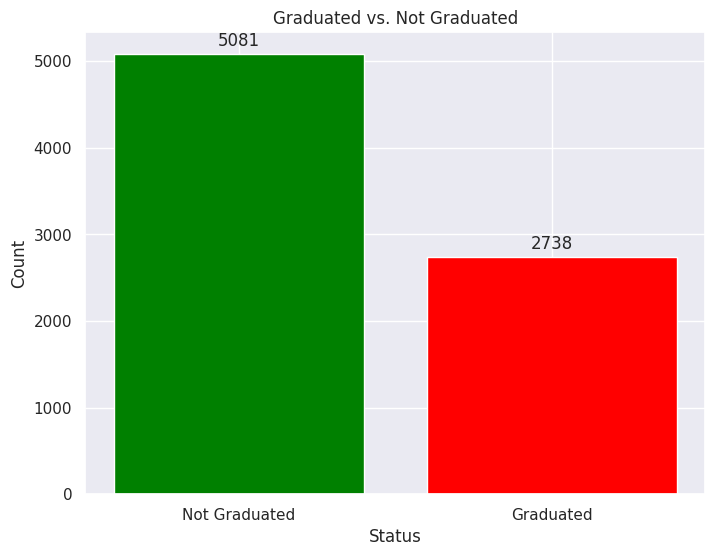

In [ ]:
# Calculate the counts for graduated and not graduated
graduated_counts = df['graduated_or_not'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(graduated_counts.index, graduated_counts.values, color=['green', 'red'])

# Set the title and labels
plt.title('Graduated vs. Not Graduated')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Graduated', 'Graduated'])  # 0 is for Not Graduated and 1 is for Graduated

# Annotate each bar with the count
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval}', xy=(bar.get_x() + bar.get_width()/2, yval), xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points", ha='center', va='bottom')

# Show the plot
plt.show()

## **Average days for graudation**


In [ ]:
# Convert 'graduated_at' and 'enrolled_at' to datetime
df['graduated_at'] = pd.to_datetime(df['graduated_at'])
df['enrolled_at'] = pd.to_datetime(df['enrolled_at'])

# Calculate the difference in days between 'graduated_at' and 'enrolled_at' excluding null 'graduated_at'
df['days_to_graduation'] = (df.loc[df['graduated_at'].notnull(), 'graduated_at'] - df['enrolled_at']).dt.days

# Calculate the average days to graduation for rows where 'days_to_graduation' is not NaN
average_days_to_graduation = df['days_to_graduation'].dropna().mean()

print(f"Average days to graduation: {average_days_to_graduation}")

Average days to graduation: 55.57377647918189


## **Distribution of days needed for graduation (boxplot)**
exclude values of 0, 1, and negative values.


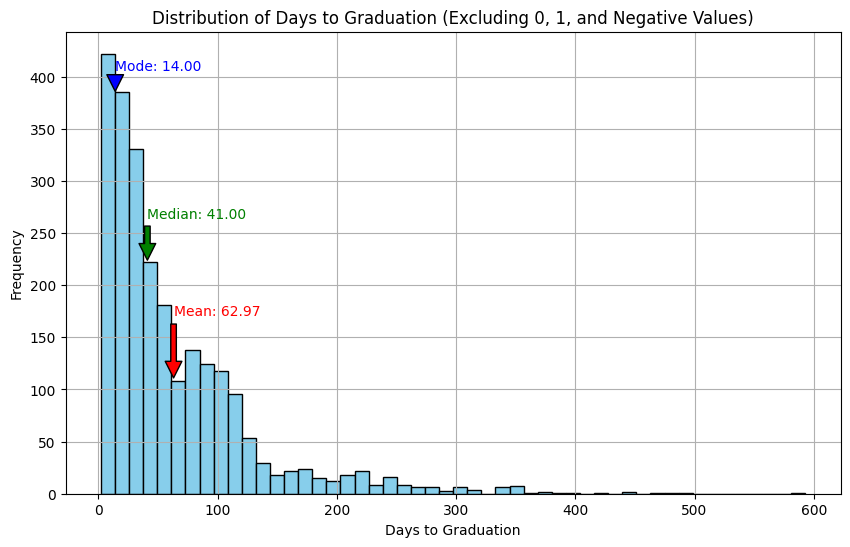

Mean: 62.96735537190083, Median: 41.0, Mode: 14.0, Std: 66.00001384579753, Variance: 4356.001827645465
Quartiles: {'25%': 19.0, '50%': 41.0, '75%': 87.0}
Range: 591.0, IQR: 68.0


In [ ]:
# Exclude values of 0, 1, and negative values from 'days_to_graduation'
filtered_df = df[(df['days_to_graduation'] > 1)]

# Plotting the distribution of Days to Graduation without excluded values
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(filtered_df['days_to_graduation'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Days to Graduation (Excluding 0, 1, and Negative Values)')
plt.xlabel('Days to Graduation')
plt.ylabel('Frequency')
plt.grid(True)

# Recalculating statistics for annotations
mean_val = filtered_df['days_to_graduation'].mean()
median_val = filtered_df['days_to_graduation'].median()
mode_val = filtered_df['days_to_graduation'].mode()[0]  # Taking the first mode

# Preventing annotation overlap by adjusting the y-position based on the histogram's frequency
mean_bin = np.digitize(mean_val, bins) - 1
median_bin = np.digitize(median_val, bins) - 1
mode_bin = np.digitize(mode_val, bins) - 1

# Ensuring unique heights for each annotation to avoid overlap
unique_heights = sorted(set([n[mean_bin], n[median_bin], n[mode_bin]]), reverse=True)
height_map = {n[mean_bin]: unique_heights.index(n[mean_bin]),
              n[median_bin]: unique_heights.index(n[median_bin]),
              n[mode_bin]: unique_heights.index(n[mode_bin])}

plt.annotate(f'Mean: {mean_val:.2f}', xy=(mean_val, n[mean_bin]), xytext=(mean_val, n[mean_bin] + (height_map[n[mean_bin]] + 1) * 0.05 * max(n)),
             arrowprops=dict(facecolor='red', shrink=0.05), color='red')
plt.annotate(f'Median: {median_val:.2f}', xy=(median_val, n[median_bin]), xytext=(median_val, n[median_bin] + (height_map[n[median_bin]] + 1) * 0.05 * max(n)),
             arrowprops=dict(facecolor='green', shrink=0.05), color='green')
plt.annotate(f'Mode: {mode_val:.2f}', xy=(mode_val, n[mode_bin]), xytext=(mode_val, n[mode_bin] + (height_map[n[mode_bin]] + 1) * 0.05 * max(n)),
             arrowprops=dict(facecolor='blue', shrink=0.05), color='blue')

plt.show()

# Displaying all the recalculated statistics concisely after excluding specified values
stats = filtered_df['days_to_graduation'].describe()
quartiles = stats.loc[['25%', '50%', '75%']].to_dict()
range_val = filtered_df['days_to_graduation'].max() - filtered_df['days_to_graduation'].min()
iqr = quartiles['75%'] - quartiles['25%']

print(f"Mean: {stats['mean']}, Median: {stats['50%']}, Mode: {mode_val}, Std: {stats['std']}, Variance: {filtered_df['days_to_graduation'].var()}")
print(f"Quartiles: {quartiles}")
print(f"Range: {range_val}, IQR: {iqr}")

## **Distribution of Learners Graduated After Estimated Graduation Date**

<ipython-input-24-2d9b87b4cd4a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['graduated_after_estimated'] = df_filtered['graduated_at'] > df_filtered['estimated_end_date']


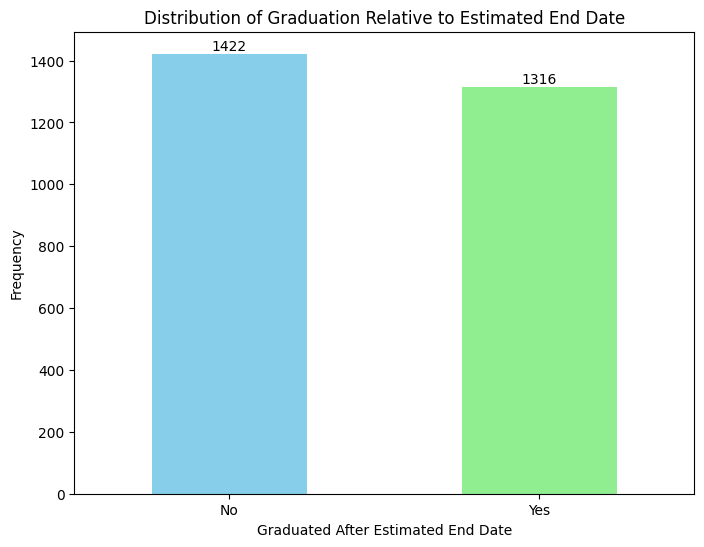

In [ ]:
# Convert 'graduated_at' and 'estimated_end_date' to datetime
df['graduated_at'] = pd.to_datetime(df['graduated_at'])
df['estimated_end_date'] = pd.to_datetime(df['estimated_end_date'])

# Filter out rows where 'graduated_at' is not null
df_filtered = df[df['graduated_at'].notnull()]

# Create a boolean column indicating if 'graduated_at' is after 'estimated_end_date'
df_filtered['graduated_after_estimated'] = df_filtered['graduated_at'] > df_filtered['estimated_end_date']

# Counting the occurrences of True and False in the new column
graduation_counts = df_filtered['graduated_after_estimated'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 6))
graduation_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Graduation Relative to Estimated End Date')
plt.xlabel('Graduated After Estimated End Date')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)  # Explicitly setting the x-tick labels for clarity

# Annotating the bar chart with the counts
for index, value in enumerate(graduation_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

## **How many programs learners are enrolled at during the same period of time (within 30 days before and after current enrollment)**

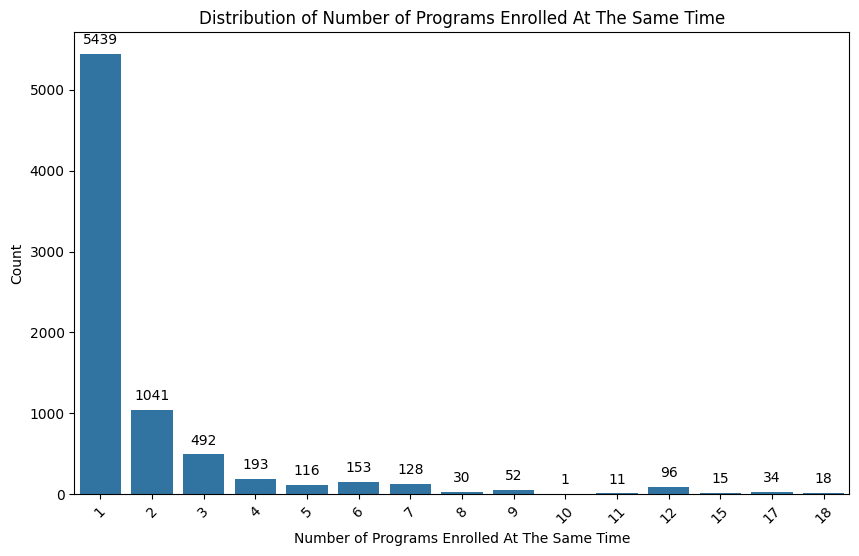

In [ ]:
# Plotting the distribution of 'num_enrollments_same_time'
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='num_enrollments_same_time', data=df)
plt.title('Distribution of Number of Programs Enrolled At The Same Time')
plt.xlabel('Number of Programs Enrolled At The Same Time')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

## **How many learners were enrolled in other programs earlier than their current enrollment?**

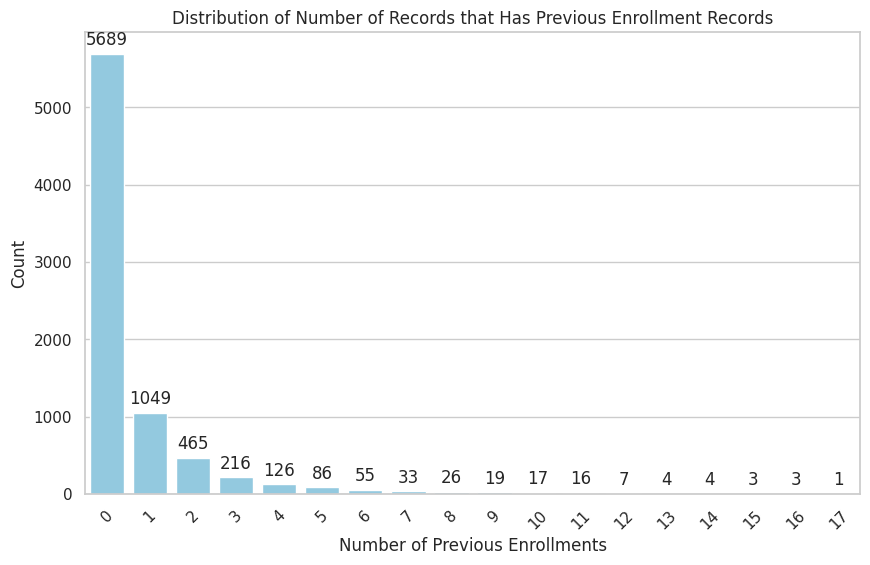

In [ ]:
# Set the visual style of the plots
sns.set(style="whitegrid")

# Create a count plot to show the distribution of num_previous_enrollments
plt.figure(figsize=(10, 6))  # Ensure consistency in figure size
ax = sns.countplot(x='num_previous_enrollments', data=df, color='skyblue')
ax.set_title('Distribution of Number of Records that Has Previous Enrollment Records')
ax.set_xlabel('Number of Previous Enrollments')
ax.set_ylabel('Count')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Annotate the bars with the count of observations for each
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

## **How many learners graduated from past programs**

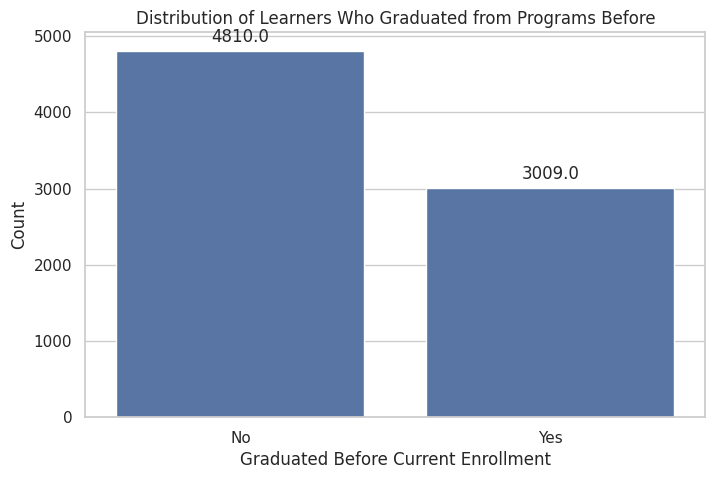

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='graduated_before', data=df)
plt.title('Distribution of Learners Who Graduated from Programs Before')
plt.xlabel('Graduated Before Current Enrollment')
plt.ylabel('Count')

# Annotate each bar with the count of observations
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    # Annotate the height (count) on top of each bar
    ax.annotate('{}'.format(height),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

## **The distribution of total concepts per program**

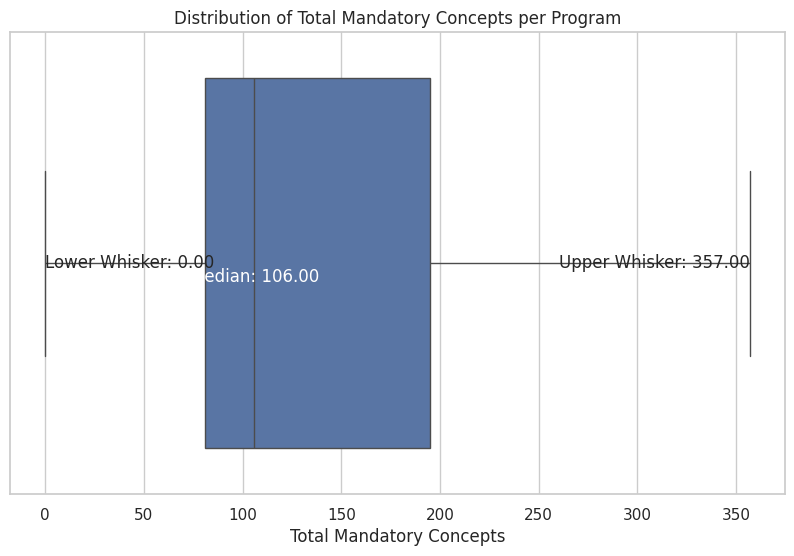

Median: 106.00
First Quartile (Q1): 81.00
Third Quartile (Q3): 195.00
Interquartile Range (IQR): 114.00
Upper Whisker: 357.00
Lower Whisker: 0.00


In [ ]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_mandatory_concepts', data=df)

# Adding notations
# Calculate the quartiles and median
q1 = df['total_mandatory_concepts'].quantile(0.25)
q3 = df['total_mandatory_concepts'].quantile(0.75)
median = df['total_mandatory_concepts'].median()
iqr = q3 - q1

# Calculate the upper and lower whiskers
upper_whisker = df['total_mandatory_concepts'][df['total_mandatory_concepts'] <= q3 + 1.5 * iqr].max()
lower_whisker = df['total_mandatory_concepts'][df['total_mandatory_concepts'] >= q1 - 1.5 * iqr].min()

# Annotate the quartiles, median, and whiskers
plt.text(x=upper_whisker, y=0.01, s=f"Upper Whisker: {upper_whisker:.2f}", horizontalalignment='right')
plt.text(x=lower_whisker, y=0.01, s=f"Lower Whisker: {lower_whisker:.2f}", horizontalalignment='left')
plt.text(x=median, y=0.04, s=f"Median: {median:.2f}", horizontalalignment='center', color='white')

# Adding outliers notation if needed
# Identifying outliers
outliers = df['total_mandatory_concepts'][(df['total_mandatory_concepts'] > q3 + 1.5 * iqr) | (df['total_mandatory_concepts'] < q1 - 1.5 * iqr)]

for outlier in outliers:
    plt.text(x=outlier, y=0.02, s=f"{outlier:.2f}", horizontalalignment='center', color='orange')

plt.title('Distribution of Total Mandatory Concepts per Program')
plt.xlabel('Total Mandatory Concepts')
plt.show()

print(f"Median: {median:.2f}")
print(f"First Quartile (Q1): {q1:.2f}")
print(f"Third Quartile (Q3): {q3:.2f}")
print(f"Interquartile Range (IQR): {iqr:.2f}")
print(f"Upper Whisker: {upper_whisker:.2f}")
print(f"Lower Whisker: {lower_whisker:.2f}")

## **The distribution of total projects per program**

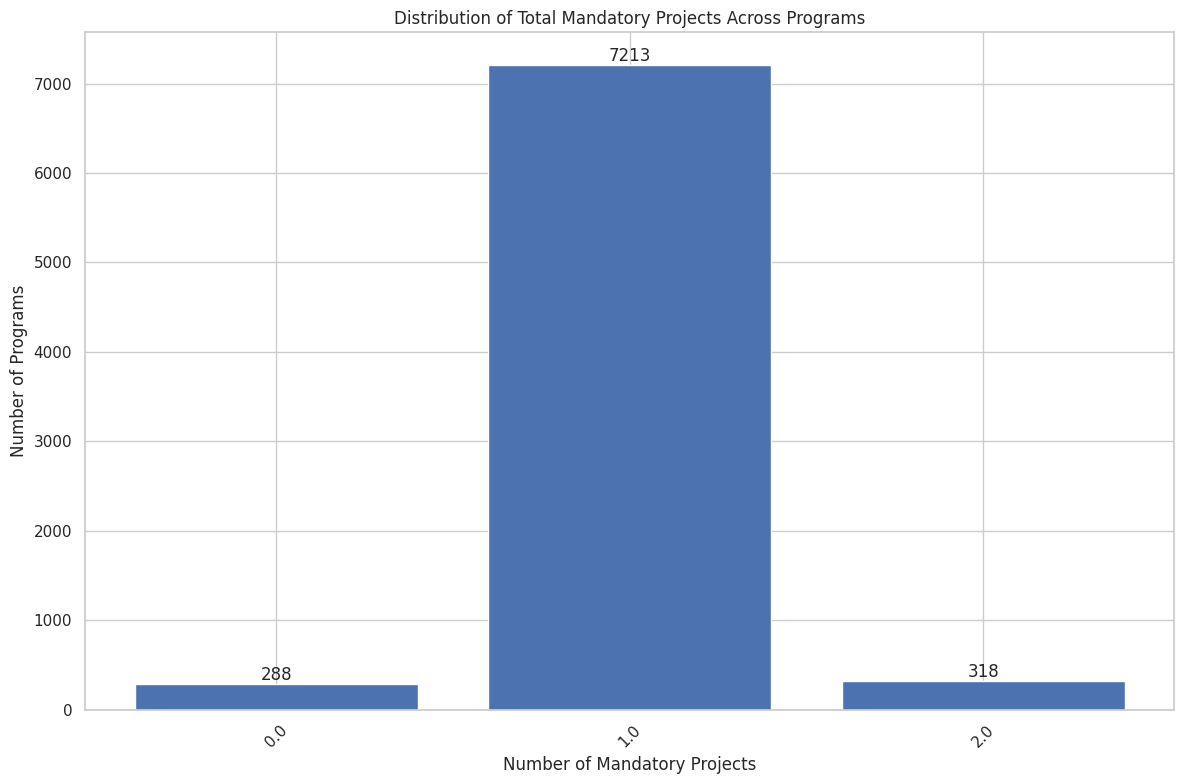

In [ ]:
# Group the dataset by 'total_mandatory_projects' and count the number of occurrences (programs) for each project count
project_distribution = df['total_mandatory_projects'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(project_distribution.index.astype(str), project_distribution.values)

# Add annotations to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.title('Distribution of Total Mandatory Projects Across Programs')
plt.xlabel('Number of Mandatory Projects')
plt.ylabel('Number of Programs')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()

# **Distribution of programs have project or not**

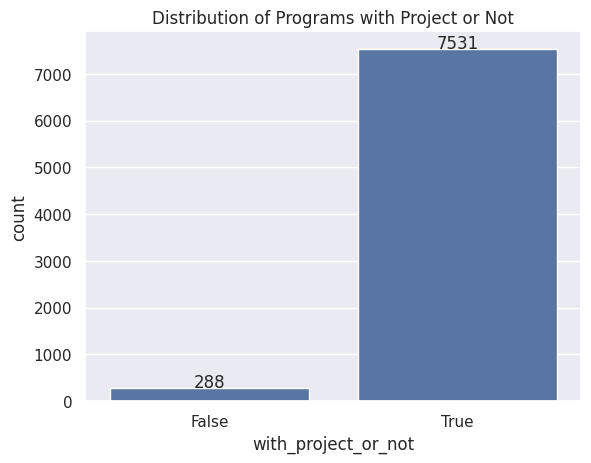

In [ ]:
# Set the style
sns.set(style="darkgrid")

# Create the count plot and get the axis object
ax = sns.countplot(x='with_project_or_not', data=df)

# Set the title
ax.set_title('Distribution of Programs with Project or Not')

# Loop through each patch (bar) in the plot
for p in ax.patches:
    # Calculate the annotation position
    height = p.get_height()
    # Add the annotation with the count
    ax.text(x=p.get_x() + p.get_width() / 2.,  # x-position
            y=height + 10,  # y-position, adding a small value to height for spacing
            s='{:.0f}'.format(height),  # text to display
            ha='center')  # horizontal alignment

# Show the plot
plt.show()

## **Distribution of contract types the enrollments belong to**

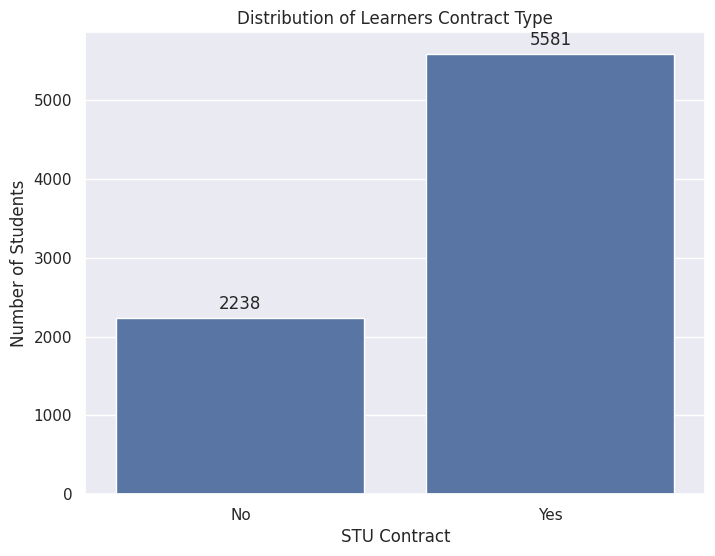

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='stu_contract_flag', data=df)
plt.title('Distribution of Learners'' Contract Type')
plt.xlabel('STU Contract')
plt.ylabel('Number of Students')
plt.xticks([0, 1], ['No', 'Yes'])

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # Format the count as a string
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                xytext=(0, 10),  # Position text 10 points above the top of the bar
                textcoords='offset points')  # Use offset points to position the text

plt.show()

# **Drop Irrelevant Columns**

In [ ]:
# List of columns to be dropped
columns_to_drop = [
    'last_active_at', 'total_mandatory_projects_completed',
    'perc_mandatory_projects_completed', 'total_mandatory_projects_completed_in_latest_enrollment',
    'last_project_completed_at', 'is_next_project_past_due', 'next_project_due_days',
    'total_mandatory_concepts_completed', 'perc_mandatory_concepts_completed',
    'total_mandatory_concepts_completed_in_latest_enrollment', 'last_concept_completed_at',
    'total_quizzes_completed', 'program_category',
    'grad_survey_submission_date', 'cohort_name', 'tag_names', 'graduated_at','unenrolled_at', 'enrolled_at', 'recommendation_rating', 'native_company_id', 'company_name', 'native_contract_id',
    'native_contract_term_id', 'native_user_id', 'email',
    'enrolled_at', 'program_title', 'program_key', 'program_type',
    'on_track_status_new','stu_contract_grace_period_in_days','enrollment_status','estimated_end_date','perc_quizzes_completed',
    'knowledge_question_asked_count', 'zendesk_ticket_count', 'knowledge_question_asked_count', 'zendesk_ticket_count',
     'ticket_count_with_good_csat_rating',
'ticket_count_with_bad_csat_rating','program_length'
]

# Drop the columns from the DataFrame
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [ ]:
# Summing up the weeks 1-4 for the desired columns
df['concept_completion_1_month'] = df[[f'concept_completion_{week}_week' for week in range(1, 5)]].sum(axis=1)
df['project_completion_1_month'] = df[[f'project_completion_{week}_week' for week in range(1, 5)]].sum(axis=1)
df['project_submitted_1_month'] = df[[f'project_submitted_{week}_week' for week in range(1, 5)]].sum(axis=1)
df['project_failed_1_month'] = df[[f'project_failed_{week}_week' for week in range(1, 5)]].sum(axis=1)

# Drop the original weekly columns for each category
weekly_columns_to_drop = [f'{category}_{week}_week' for category in ['concept_completion', 'project_completion', 'project_submitted', 'project_failed'] for week in range(1, 5)]
df = df.drop(columns=weekly_columns_to_drop)


In [ ]:
# Columns related to weeks 5 to 8 and after 2 months for all categories
weeks_to_drop = ['5_week', '6_week', '7_week', '8_week', 'after_2_months']
categories = ['concept_completion', 'project_completion', 'project_submitted', 'project_failed']

# Generate a list of column names to drop based on the categories and weeks
columns_to_drop = [f'{category}_{week}' for category in categories for week in weeks_to_drop]

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7819 entries, 0 to 7818
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   stu_contract_flag                                7819 non-null   bool   
 1   company_auto_enroll_flag                         7819 non-null   bool   
 2   is_subscription                                  7819 non-null   bool   
 3   is_teams_contract                                7819 non-null   bool   
 4   is_company_sso                                   7819 non-null   bool   
 5   enrollment_id                                    7819 non-null   object 
 6   total_mandatory_projects                         7819 non-null   float64
 7   total_mandatory_concepts                         7819 non-null   float64
 8   total_quizzes                                    7812 non-null   float64
 9   primary_school                

<a name="section_6"></a>
# **Feature Engineering (post Train/Test split)**

In [ ]:
# Split the DataFrame into features and target variable
X = df.drop('graduated_or_not', axis=1)
y = df['graduated_or_not']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Deal with missing data**

In [ ]:
# Convert specified columns to 'category' dtype
columns_to_convert = [
    'stu_contract_flag',
    'company_auto_enroll_flag',
    'is_subscription',
    'is_teams_contract',
    'is_company_sso',
    'cohort_or_not',
    'group_or_not',
    'graduated_before',
    'primary_school',
    'difficulty_level'
]

for column in columns_to_convert:
    X_train[column] = X_train[column].astype('category')
    X_test[column] = X_test[column].astype('category')

In [ ]:
def handle_missing_values(df):
    # Handling missing values for 'total_quizzes' by filling with the mean
    columns_to_mean_fill = ['total_quizzes']
    for column in columns_to_mean_fill:
        df[column] = df[column].fillna(df[column].mean())

    # Ensure the new category exists in 'primary_school' before filling missing values
    if 'No Primary School' not in df['primary_school'].cat.categories:
        df['primary_school'] = df['primary_school'].cat.add_categories('No Primary School')
    df['primary_school'] = df['primary_school'].fillna('No Primary School').replace('', 'No Primary School')

    # Ensure the new category exists in 'difficulty_level' before filling missing values
    if 'No Difficulty Level' not in df['difficulty_level'].cat.categories:
        df['difficulty_level'] = df['difficulty_level'].cat.add_categories('No Difficulty Level')
    df['difficulty_level'] = df['difficulty_level'].fillna('No Difficulty Level').replace('', 'No Difficulty Level')

    # Handling 'avg_project_pass_rate' with a conditional approach
    mean_avg_project_pass_rate = df['avg_project_pass_rate'][df['avg_project_pass_rate'].notnull()].mean()
    df.loc[df['with_project_or_not'], 'avg_project_pass_rate'] = df.loc[df['with_project_or_not'], 'avg_project_pass_rate'].fillna(mean_avg_project_pass_rate)
    df.loc[~df['with_project_or_not'], 'avg_project_pass_rate'] = df.loc[~df['with_project_or_not'], 'avg_project_pass_rate'].fillna(-1)

    return df

# Apply the function to handle missing values separately for training and testing sets
X_train = handle_missing_values(X_train)
X_test = handle_missing_values(X_test)

In [ ]:
# Create 'Content Volume' seperately for X_train and X_test

# For X_train
X_train['content_volume'] = X_train['total_mandatory_concepts'] + X_train['total_quizzes']
X_train.drop(['total_mandatory_concepts', 'total_quizzes'], axis=1, inplace=True)

# For X_test
X_test['content_volume'] = X_test['total_mandatory_concepts'] + X_test['total_quizzes']
X_test.drop(['total_mandatory_concepts', 'total_quizzes'], axis=1, inplace=True)

In [ ]:
# Check for missing data in X_train
missing_data_X_train = X_train.isnull().sum()
missing_data_X_train = missing_data_X_train[missing_data_X_train > 0]

if not missing_data_X_train.empty:
    print("Missing data in X_train:")
    print(missing_data_X_train)
else:
    print("No missing data in X_train.")

# Check for missing data in X_test
missing_data_X_test = X_test.isnull().sum()
missing_data_X_test = missing_data_X_test[missing_data_X_test > 0]

if not missing_data_X_test.empty:
    print("Missing data in X_test:")
    print(missing_data_X_test)
else:
    print("No missing data in X_test.")

No missing data in X_train.
No missing data in X_test.


### **Detect and Deal with Outliers (Capping Outliers)**

In [ ]:
# Function to return outlier indices for a column
def detect_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1

    outlier_indices = column.index[((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))).values]
    return outlier_indices

# Apply the function to each numeric column in the DataFrame and store the result
outlier_indices_dict = {}

for column in df.select_dtypes(include=[np.number]).columns:
    outliers = detect_outliers(df[column])
    if len(outliers) > 0:
        outlier_indices_dict[column] = outliers

# Display the columns that have outliers and the indices of these outliers
for column, indices in outlier_indices_dict.items():
    print(f"Column '{column}' has outliers at indices: {list(indices)}")

Column 'total_mandatory_projects' has outliers at indices: [11, 15, 18, 19, 20, 29, 34, 36, 38, 45, 48, 50, 88, 112, 117, 123, 124, 146, 151, 167, 173, 179, 251, 252, 267, 269, 305, 361, 421, 447, 455, 527, 623, 632, 648, 702, 712, 713, 718, 746, 762, 781, 783, 785, 787, 792, 797, 817, 912, 913, 935, 937, 1026, 1050, 1072, 1099, 1116, 1151, 1152, 1154, 1167, 1168, 1170, 1172, 1174, 1196, 1219, 1231, 1269, 1275, 1282, 1311, 1312, 1338, 1339, 1383, 1384, 1388, 1392, 1425, 1536, 1537, 1553, 1563, 1569, 1572, 1573, 1574, 1576, 1577, 1583, 1584, 1589, 1590, 1592, 1606, 1642, 1671, 1706, 1709, 1727, 1732, 1745, 1754, 1781, 1799, 1802, 1804, 1846, 1859, 1869, 1908, 1912, 1926, 1929, 1930, 1942, 1959, 1960, 1962, 1965, 1973, 2015, 2032, 2090, 2149, 2153, 2157, 2158, 2165, 2170, 2171, 2173, 2174, 2179, 2180, 2186, 2187, 2188, 2189, 2191, 2194, 2199, 2200, 2209, 2210, 2218, 2221, 2225, 2226, 2232, 2390, 2443, 2453, 2478, 2484, 2493, 2498, 2515, 2528, 2540, 2544, 2559, 2640, 2664, 2673, 2681, 268

In [ ]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    series = np.where(series < lower_bound, lower_bound, series)
    series = np.where(series > upper_bound, upper_bound, series)
    return series

for column in X_train.select_dtypes(include=[np.number]).columns:
    X_train[column] = cap_outliers(X_train[column])

for column in X_test.select_dtypes(include=[np.number]).columns:
    X_test[column] = cap_outliers(X_test[column])

In [ ]:
# Recheck outliers
def has_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check if any values are below the lower bound or above the upper bound
    return ((column < lower_bound) | (column > upper_bound)).any()

def check_data_for_outliers(data):
    outlier_columns = []
    for column in data.select_dtypes(include=[np.number]).columns:
        if has_outliers(data[column]):
            outlier_columns.append(column)
    return outlier_columns

outliers_in_X_train = check_data_for_outliers(X_train)
outliers_in_X_test = check_data_for_outliers(X_test)

if outliers_in_X_train:
    print(f"Outliers still present in X_train columns: {outliers_in_X_train}")
else:
    print("No outliers present in X_train.")

if outliers_in_X_test:
    print(f"Outliers still present in X_test columns: {outliers_in_X_test}")
else:
    print("No outliers present in X_test.")

No outliers present in X_train.
No outliers present in X_test.


# **Encode the category columns using one hot encoding**



In [ ]:
columns_to_convert = [
    'stu_contract_flag',
    'company_auto_enroll_flag',
    'is_subscription',
    'is_teams_contract',
    'is_company_sso',
    'cohort_or_not',
    'group_or_not',
    'graduated_before',
    'primary_school',
    'difficulty_level',
    'with_project_or_not'
]

# Perform one-hot encoding on the training set with drop_first=True
X_train_encoded = pd.get_dummies(X_train, columns=columns_to_convert, drop_first=True)

# Perform one-hot encoding on the test set with drop_first=True
X_test_encoded = pd.get_dummies(X_test, columns=columns_to_convert, drop_first=True)

# Align the training and test sets to ensure they have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)


### **Apply SMOTE on X train to deal with imbalanced data set issue**

In [ ]:
# For the training data
X_train_encoded = X_train_encoded.set_index('enrollment_id')

# For the test data
X_test_encoded = X_test_encoded.set_index('enrollment_id')

In [ ]:
# Initialize the SMOTE sampler
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

# Display the number of rows after SMOTE
print(f"Number of rows in the original training data: {X_train_encoded.shape[0]}")
print(f"Number of rows in the training data after SMOTE: {X_train_resampled.shape[0]}")

Number of rows in the original training data: 6255
Number of rows in the training data after SMOTE: 8214


<a name="section_7"></a>
# **Training Model And Evaluating**

### **Baseline Model: XGBoost**

In [ ]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Fit the model to the training data
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Predict on test data (X_test_encoded)to evaluate the model
y_pred = xgb_clf.predict(X_test_encoded)

# If you have y_test, you can also compute the accuracy or other performance metrics
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       974
           1       0.75      0.73      0.74       590

    accuracy                           0.81      1564
   macro avg       0.80      0.79      0.79      1564
weighted avg       0.81      0.81      0.81      1564



In [ ]:
importances = xgb_clf.feature_importances_

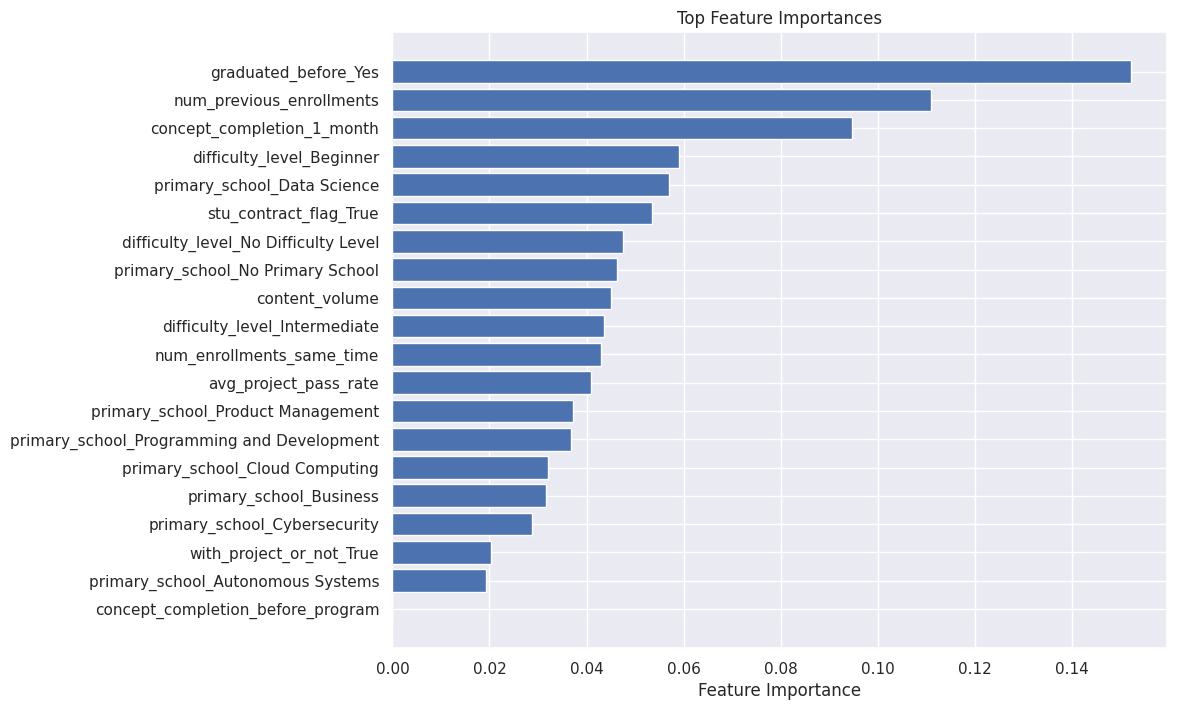

In [ ]:
# Choose a reasonable number of features to display
top_n_features = 20

# Sort the features by their importance
sorted_indices = np.argsort(importances)[-top_n_features:]

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(range(top_n_features), importances[sorted_indices], align='center')
plt.yticks(range(top_n_features), X_train_resampled.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Top Feature Importances')
plt.show()

### **Hyperparameter tuning for the baseline model**
Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.8}
Best score: 0.8589037165756175


In [ ]:

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV - this might take a while
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

### **Hyperparameter tuning for the baseline model using stratifiedKFold**

Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}
Best score: 0.8608473700481056

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', verbose=1)

# Fit GridSearchCV - this might take a while
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}
Best score: 0.8541509656365209


## **Re-train the model with the best parameters on the full training set**

In [ ]:
# Re-train the model with the best parameters on the full training set
best_params = grid_search.best_params_
xgb_clf_optimized = xgb.XGBClassifier(**best_params, objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf_optimized.fit(X_train_resampled, y_train_resampled)

# And then evaluate this optimized model on the test set
y_pred_optimized = xgb_clf_optimized.predict(X_test_encoded)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {accuracy_optimized:.2f}")
print(classification_report(y_test, y_pred_optimized))

Optimized Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       974
           1       0.74      0.72      0.73       590

    accuracy                           0.80      1564
   macro avg       0.79      0.79      0.79      1564
weighted avg       0.80      0.80      0.80      1564



### **Other models : Random Forest Tree**

In [ ]:
# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the resampled training data
rf_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = rf_clf.predict(X_test_encoded)

# Evaluate the model's performance
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

### **Other Models: LightGBM**

In [ ]:
# Create a LightGBM dataset from the resampled training data
train_data = lgb.Dataset(X_train_resampled, label=y_train_resampled)

# Define model's parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting': 'gbdt',
    'learning_rate': 0.1,
    'verbose': 0
}

# Train the model
num_round = 100
lgbm_model = lgb.train(params, train_data, num_round)

# Predict on the test set
y_pred_proba = lgbm_model.predict(X_test_encoded)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_proba]

# Evaluate the model
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

### **Other Models: Support Vector Machines (SVM)**



In [ ]:
# Initialize a scaler and SVM model within a pipeline
svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))

# Fit the pipeline to the resampled training data
svm_pipeline.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = svm_pipeline.predict(X_test_encoded)

# Evaluate the model
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

### **Other Models: Logistic Regression**

In [ ]:
# Initialize a pipeline with a scaler and logistic regression model
lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

# Fit the pipeline to the resampled training data
lr_pipeline.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = lr_pipeline.predict(X_test_encoded)

# Evaluate the model
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

### **Ensemble  LightGBM (0.819), XGBoost (0.82), and Random Forest (0.816)**

Given that LightGBM, XGBoost, and Random Forest can all output probabilities, a "soft" voting ensemble might be particularly effective.

### **Voting Methods**

In [ ]:
# Initialize the individual models with their best found hyperparameters
model1 = lightgbm.LGBMClassifier(objective='binary', random_state=42)
model2 = xgboost.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')
model3 = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the voting classifier ensemble
ensemble = VotingClassifier(estimators=[
    ('lightgbm', model1),
    ('xgboost', model2),
    ('random_forest', model3)
], voting='soft')

# Fit the ensemble to the resampled training data
ensemble.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Predict on the test set
y_pred = ensemble.predict(X_test_encoded)

# Evaluate the ensemble model
print(f"Ensemble Accuracy on Test Set: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

### **Stacking methods**

In [ ]:
# Define the base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgboost.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('lgbm', lightgbm.LGBMClassifier(objective='binary', random_state=42))
]

# Define the meta-learner
meta_learner = LogisticRegression(random_state=42)

In [ ]:
# Create the stacking ensemble
stacking_ensemble = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Fit the model on the resampled training data
stacking_ensemble.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Predict on the test set
y_pred_stack = stacking_ensemble.predict(X_test_encoded)

# Evaluate the ensemble model with stacking
print(f"Stacking Ensemble Accuracy on Test Set: {accuracy_score(y_test, y_pred_stack)}")
print(classification_report(y_test, y_pred_stack))

### **Neural Networks**

In [ ]:
# Scale data for neural network training
scaler = StandardScaler().fit(X_train_resampled)
X_train_scaled = scaler.transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_encoded)

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.005),
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_resampled,
                    validation_split=0.2,  # Use part of the training data for validation
                    epochs=100,  # Start with 100 epochs; you may need to adjust this
                    batch_size=32,
                    verbose=1)

# Evaluate the model on the test set
_, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy}")

# **Fine-Tune Hyperparameters for Ensemble**

output :Best parameters: {'lgbm__learning_rate': 0.01, 'lgbm__n_estimators': 100, 'rf__max_depth': 20, 'rf__n_estimators': 200, 'xgb__learning_rate': 0.1, 'xgb__n_estimators': 200}
Best score: 0.8673046171592768

In [ ]:
# Define the base models with default parameters (you can adjust these as needed)
model1 = lgb.LGBMClassifier(random_state=42)
model2 = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model3 = RandomForestClassifier(random_state=42)

# Create the voting classifier ensemble
ensemble = VotingClassifier(estimators=[
    ('lgbm', model1),
    ('xgb', model2),
    ('rf', model3)
], voting='soft')

# Define the parameter grid
param_grid = {
    'lgbm__n_estimators': [100, 200],
    'lgbm__learning_rate': [0.01, 0.1],
    'xgb__n_estimators': [100, 200],
    'xgb__learning_rate': [0.01, 0.1],
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# apply best parameters on test set
Best parameters: {'lgbm__learning_rate': 0.1, 'lgbm__n_estimators': 100, 'rf__max_depth': None, 'rf__n_estimators': 100, 'xgb__learning_rate': 0.1, 'xgb__n_estimators': 200}
Best score: 0.8606076938074864



In [ ]:
# Adjust the base models according to the best parameters identified
model1 = lgb.LGBMClassifier(random_state=42, learning_rate=0.1, n_estimators=100)
model2 = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', learning_rate=0.1, n_estimators=200)
model3 = RandomForestClassifier(random_state=42, n_estimators=100)

# Create the voting classifier ensemble with the updated models
ensemble = VotingClassifier(estimators=[
    ('lgbm', model1),
    ('xgb', model2),
    ('rf', model3)
], voting='soft')

# Fit the ensemble model to the training data
ensemble.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
predictions = ensemble.predict(X_test_encoded)

# Evaluate the predictions
accuracy = accuracy_score(y_test, predictions)
print(f"Test set accuracy: {accuracy}")

# Print classification report
report = classification_report(y_test, predictions)
print(report)

<a name="section_8"></a>
# **Model Explaination**

### XGBoost after hyperparameter fine tuning

In [ ]:
import shap

# Create a SHAP TreeExplainer for the XGBoost model
explainer = shap.Explainer(xgb_clf_optimized)

# Calculate SHAP values for the test set
# Note: Depending on dataset size, this can be resource-intensive. Consider using a subset.
shap_values = explainer(X_test_encoded)

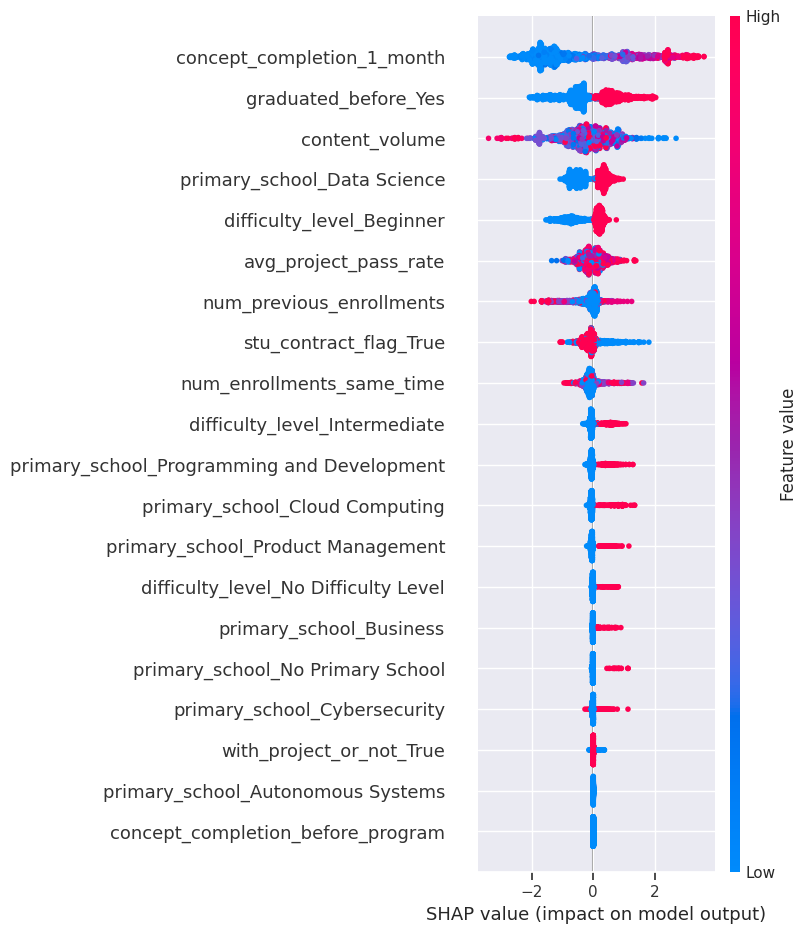

In [ ]:
shap.summary_plot(shap_values, X_test_encoded)

### **Dependence Plot: show the effect of a single feature across the whole dataset.**

In [ ]:
shap.plots.scatter(shap_values["cohort_or_not_Yes"])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
shap.plots.scatter(shap_values[:, "group_or_not_Yes"])

### **Interpretation of a specific prediction**

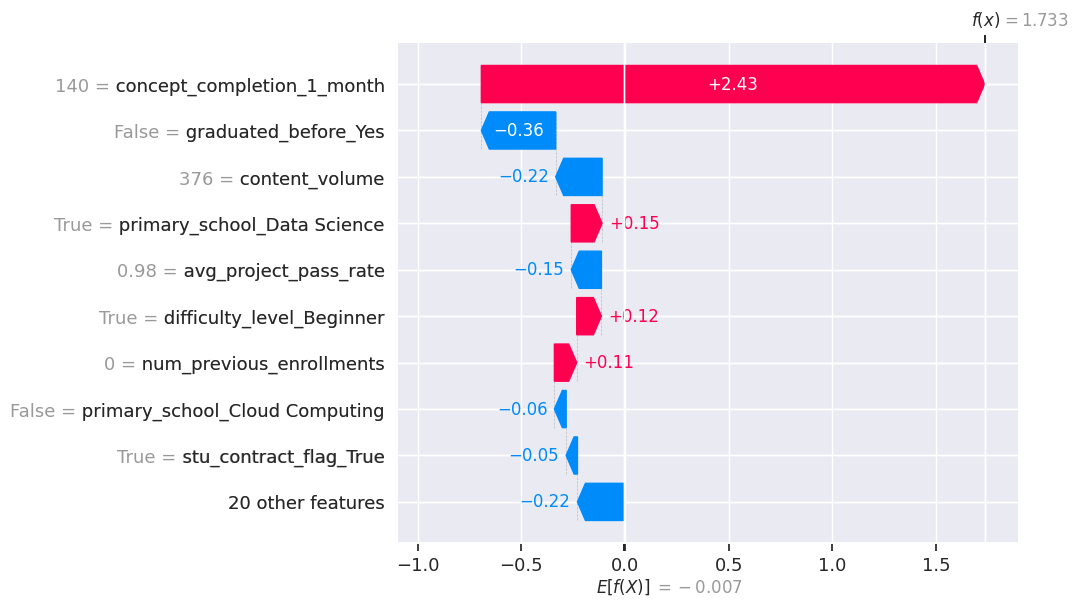

In [ ]:
# For a specific prediction, e.g., the first instance in the test set
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.plots.waterfall(shap_values[10])

In [ ]:
shap.plots.waterfall(shap_values[100])

### **Calculate the likelihood of graduation for each enrollment and store it in a new column**

In [ ]:
# Retrieve the best estimator from the completed grid search
best_xgb_clf = grid_search.best_estimator_

# Predict probabilities for the positive class (graduation)
y_proba = best_xgb_clf.predict_proba(X_test_encoded)[:, 1]  # This gives the probability for class 1 (graduated)

# Convert probabilities to percentages
y_proba_percent = y_proba * 100

# Create a DataFrame with the prediction scores
predictions_df = pd.DataFrame(y_proba_percent, columns=['Graduation Likelihood'])

# Concatenate the prediction scores with the original test set
X_test_with_predictions = pd.concat([X_test.reset_index(drop=True), predictions_df], axis=1)


In [ ]:
# Now X_test_with_predictions has an additional column with the graduation likelihood in percentage
X_test_with_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   stu_contract_flag                                1564 non-null   category
 1   company_auto_enroll_flag                         1564 non-null   category
 2   is_subscription                                  1564 non-null   category
 3   is_teams_contract                                1564 non-null   category
 4   is_company_sso                                   1564 non-null   category
 5   enrollment_id                                    1564 non-null   object  
 6   total_mandatory_projects                         1564 non-null   float64 
 7   primary_school                                   1564 non-null   category
 8   difficulty_level                                 1564 non-null   category
 9   concept_completion_

In [ ]:
if 'enrollment_id' in X_test_with_predictions.columns:
    # Set 'enrollment_id' as the index
    X_test_with_predictions.set_index('enrollment_id', inplace=True)
    print("Index set to 'enrollment_id'.")
else:
    print("'enrollment_id' column not found in X_test_with_predictions.")

Index set to 'enrollment_id'.


# **Add SHAP Value to the Excel**

In [ ]:
# Convert SHAP values to DataFrame
shap_values_df = pd.DataFrame(shap_values.values, columns=[f'SHAP_{col}' for col in X_test_encoded.columns])

# Ensure the SHAP values DataFrame index matches the original test set index
shap_values_df.index = X_test_with_predictions.index

# Reset the index of the test set with predictions to ensure alignment when concatenating
X_test_with_predictions_reset = X_test_with_predictions.reset_index()

# Concatenate the SHAP values DataFrame with the original test set with predictions
X_test_with_shap = pd.concat([X_test_with_predictions_reset, shap_values_df.reset_index(drop=True)], axis=1)

# Set the index of the final DataFrame to `enrollment_id`
X_test_with_shap.set_index('enrollment_id', inplace=True)

# Display the final DataFrame
X_test_with_shap.head()


# **Generate Excel with all original columns + prediciton + shap values**

In [ ]:
# Read the original CSV file
df_original = pd.read_csv('/content/dataset_features_created_0411.csv')

# Set 'enrollment_id' as the index of the original DataFrame
df_original.set_index('enrollment_id', inplace=True)

# Rename SHAP_ columns to Factor_
X_test_with_shap.rename(columns=lambda col: col.replace('SHAP_', 'Factor_') if col.startswith('SHAP_') else col, inplace=True)

# Integrate X_test_with_shap with df_original using index
# This will keep all original columns and add the new columns from X_test_with_shap
# Only keep rows with 'enrollment_id' in X_test_with_shap
df_combined = df_original.join(X_test_with_shap, how='inner', rsuffix='_shap')

# Display the combined DataFrame
print(df_combined.head())

# Save the combined DataFrame to a new CSV file if needed
df_combined.to_csv('/content/combined_dataset_2.csv')